<a href="https://colab.research.google.com/github/yuqiw4/Movie-Recommendation-System-by-Deep-Learning/blob/master/Movie_Recommandation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Recommandation System with DL in Keras

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read Data

In [0]:
ratings = pd.read_csv('drive/My Drive/Colab Notebooks/ml-latest-small/ratings.csv')
ratings[-20:]

,userId,movieId,rating,timestamp
100816,610,158872,3.5,1493848024
100817,610,158956,3.0,1493848947
100818,610,159093,3.0,1493847704
100819,610,160080,3.0,1493848031
100820,610,160341,2.5,1479545749
100821,610,160527,4.5,1479544998
100822,610,160571,3.0,1493848537
100823,610,160836,3.0,1493844794
100824,610,161582,4.0,1493847759
100825,610,161634,4.0,1493848362


In [0]:
movies = pd.read_csv('drive/My Drive/Colab Notebooks/ml-latest-small/movies.csv')
movies[-20:]

,movieId,title,genres
9722,189547,Iron Soldier (2010),Action|Sci-Fi
9723,189713,BlacKkKlansman (2018),Comedy|Crime|Drama
9724,190183,The Darkest Minds (2018),Sci-Fi|Thriller
9725,190207,Tilt (2011),Drama|Romance
9726,190209,Jeff Ross Roasts the Border (2017),Comedy
9727,190213,John From (2015),Drama
9728,190215,Liquid Truth (2017),Drama
9729,190219,Bunny (1998),Animation
9730,190221,Hommage à Zgougou (et salut à Sabine Mamou) (2...,Documentary
9731,191005,Gintama (2017),Action|Adventure|Comedy|Sci-Fi


In [0]:
movie_rating = pd.merge(ratings, movies, how='inner', on = 'movieId')
movie_rating[-20:]

,userId,movieId,rating,timestamp,title,genres
100816,610,139511,3.0,1479545400,Exte: Hair Extensions (2007),Horror
100817,610,139655,3.0,1493848639,Goodnight Mommy (Ich seh ich seh) (2014),Drama|Fantasy|Horror|Thriller
100818,610,140267,4.0,1493848268,The Witch (2015),Horror
100819,610,141400,4.0,1479544170,Invincible Shaolin (1978),Action
100820,610,141799,3.5,1493848820,Cooties (2015),Comedy|Horror
100821,610,142366,3.0,1479543146,Cigarette Burns (2005),Horror|Thriller
100822,610,142598,4.0,1493848878,Last Shift (2014),Horror
100823,610,145951,0.5,1493849019,Bloodsport: The Dark Kumite (1999),Action|Thriller
100824,610,146309,4.0,1493850187,The Boy and the Beast (2015),Action|Adventure|Animation
100825,610,147657,4.0,1479544210,Masked Avengers (1981),Action


In [0]:
len(ratings.userId.unique()), len(ratings.movieId.unique()), len(movie_rating.genres.unique())

(610, 9724, 951)

In [0]:
movie_rating.genres = movie_rating.genres.astype('category').cat.codes.values
movie_rating.userId = movie_rating.userId.astype('category').cat.codes.values
movie_rating.movieId = movie_rating.movieId.astype('category').cat.codes.values
movie_rating[-20:]

,userId,movieId,rating,timestamp,title,genres
100816,609,8974,3.0,1479545400,Exte: Hair Extensions (2007),910
100817,609,8978,3.0,1493848639,Goodnight Mommy (Ich seh ich seh) (2014),819
100818,609,8995,4.0,1493848268,The Witch (2015),910
100819,609,9016,4.0,1479544170,Invincible Shaolin (1978),1
100820,609,9026,3.5,1493848820,Cooties (2015),709
100821,609,9045,3.0,1479543146,Cigarette Burns (2005),922
100822,609,9059,4.0,1493848878,Last Shift (2014),910
100823,609,9103,0.5,1493849019,Bloodsport: The Dark Kumite (1999),337
100824,609,9109,4.0,1493850187,The Boy and the Beast (2015),3
100825,609,9135,4.0,1479544210,Masked Avengers (1981),1


In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(movie_rating, test_size=0.2)

## Matrix Factorisation (MF) in Keras

In [0]:
import keras
from IPython.display import SVG
from keras.optimizers import Adam
from keras.utils.vis_utils import model_to_dot
n_users, n_movies,n_genres = len(movie_rating.userId.unique()), len(movie_rating.movieId.unique()),len(movie_rating.genres.unique())
n_latent_factors = 2

In [0]:
movie_input = keras.layers.Input(shape=[1],name='Movie')
movie_embedding = keras.layers.Embedding(n_movies + 1, n_latent_factors, name='Movie-Embedding')(movie_input)
movie_vec = keras.layers.Flatten(name='FlattenMovies')(movie_embedding)

user_input = keras.layers.Input(shape=[1],name='User')
user_embedding = keras.layers.Embedding(n_users + 1, n_latent_factors,name='User-Embedding')(user_input)
user_vec = keras.layers.Flatten(name='FlattenUsers')(user_embedding)

prod = keras.layers.dot([movie_vec, user_vec], 1)
model_MF = keras.Model([user_input, movie_input], prod)
model_MF.compile('adam', 'mean_squared_error')

Instructions for updating:
Colocations handled automatically by placer.


## Non-negative Matrix Factorisation (NNMF) in Keras

In [0]:
from keras.constraints import non_neg
movie_input = keras.layers.Input(shape=[1],name='Movie')
movie_embedding = keras.layers.Embedding(n_movies + 1, n_latent_factors, name='NonNegMovie-Embedding', embeddings_constraint=non_neg())(movie_input)
movie_vec = keras.layers.Flatten(name='FlattenMovies')(movie_embedding)

user_input = keras.layers.Input(shape=[1],name='User')
user_embedding = keras.layers.Embedding(n_users + 1, n_latent_factors,name='User-Embedding', embeddings_constraint=non_neg())(user_input)
user_vec = keras.layers.Flatten(name='FlattenUsers')(user_embedding)

prod = keras.layers.dot([movie_vec, user_vec], 1)
model_NNMF = keras.Model([user_input, movie_input], prod)
model_NNMF.compile('adam', 'mean_squared_error')

In [0]:
model_MF.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Movie (InputLayer)              (None, 1)            0                                            
__________________________________________________________________________________________________
User (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
Movie-Embedding (Embedding)     (None, 1, 2)         19450       Movie[0][0]                      
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 2)         1222        User[0][0]                       
__________________________________________________________________________________________________
FlattenMov

In [0]:
model_NNMF.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Movie (InputLayer)              (None, 1)            0                                            
__________________________________________________________________________________________________
User (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
NonNegMovie-Embedding (Embeddin (None, 1, 2)         19450       Movie[0][0]                      
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 2)         1222        User[0][0]                       
__________________________________________________________________________________________________
FlattenMov

In [0]:
history_MF = model_MF.fit([train.userId, train.movieId], train.rating, epochs=100, verbose=0)

Instructions for updating:
Use tf.cast instead.


In [0]:
history_NNMF = model_NNMF.fit([train.userId, train.movieId], train.rating, epochs=100, verbose=0)

In [0]:
print(history_MF.history)

{'loss': [12.525541291071603, 7.683671144522454, 4.259740232138616, 2.863245012066553, 2.1314568266478693, 1.6987966015501217, 1.423859729252343, 1.2390890428601067, 1.1095239766063645, 1.0157549400851422, 0.9458717014554674, 0.8918691490422032, 0.8496719156708025, 0.8154059160197267, 0.7878733334584709, 0.7646690175382798, 0.7450071564006564, 0.728560256000113, 0.7142506820968639, 0.7020023493529868, 0.6914752772178684, 0.6825707840914765, 0.674856166172945, 0.6674391598495061, 0.6619013765928511, 0.6572938162853587, 0.6532930763013576, 0.6496489709959439, 0.6468179033263884, 0.6444687687328647, 0.6418054022750934, 0.6396551988662403, 0.6374973893437499, 0.6355112649283506, 0.6336171400560623, 0.6314868165680961, 0.6293359690200309, 0.6272052453028498, 0.6247090638724223, 0.6222544784006097, 0.619735560322243, 0.6166859135639805, 0.6144112474758647, 0.6118643326403963, 0.6093080616076523, 0.6070352038630427, 0.6042465463169105, 0.602141404897307, 0.5996909301967964, 0.5978685874121932

Text(0, 0.5, 'Train Error')

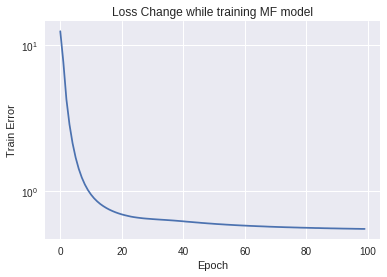

In [0]:
pd.Series(history_MF.history['loss']).plot(logy=True)
plt.title("Loss Change while training MF model")
plt.xlabel("Epoch")
plt.ylabel("Train Error")

Text(0, 0.5, 'Train Error')

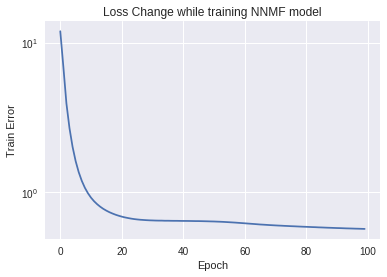

In [0]:
pd.Series(history_NNMF.history['loss']).plot(logy=True)
plt.title("Loss Change while training NNMF model")
plt.xlabel("Epoch")
plt.ylabel("Train Error")

In [0]:
# MF

y_hat_MF = np.round(model_MF.predict([test.userId, test.movieId]),5)
y_true = test.rating

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_true, y_hat_MF))
print(mean_squared_error(y_true, y_hat_MF))

0.7720331520774316
1.1986086799951052


In [0]:
# NNMF
y_hat_NNMF = np.round(model_NNMF.predict([test.userId, test.movieId]),5)
print(mean_absolute_error(y_true, y_hat_NNMF))
print(mean_squared_error(y_true, y_hat_NNMF))

0.7719452265726064
1.1910531341654538


In [0]:
train.loc[train['userId']==259,]

,userId,movieId,rating,timestamp,title,genres
4727,259,520,5.0,1109409053,Fargo (1996),648
95212,259,4523,2.5,1109410242,Millennium Actress (Sennen joyû) (2001),572
45053,259,2899,3.5,1109409208,Nurse Betty (2000),646
70495,259,4775,2.5,1109409891,Naked Lunch (1991),827
81725,259,5323,3.0,1109410709,"Motorcycle Diaries, The (Diarios de motociclet...",465
36875,259,3979,4.5,1109410553,Spirited Away (Sen to Chihiro no kamikakushi) ...,392
57802,259,330,2.5,1109408664,Reality Bites (1994),687
52889,259,2802,4.0,1109408339,Chicken Run (2000),517
61909,259,1812,4.5,1109409303,Clue (1985),660
95219,259,5015,5.0,1109410367,True Stories (1986),720


## Deep Neural Networks for Recommendation

In [0]:
n_latent_factors_user = 2
n_latent_factors_movie = 3

movie_input = keras.layers.Input(shape=[1],name='Movie')
movie_embedding = keras.layers.Embedding(n_movies + 1, n_latent_factors_movie, name='Movie-Embedding')(movie_input)
movie_vec = keras.layers.Flatten(name='FlattenMovies')(movie_embedding)
movie_vec = keras.layers.Dropout(0.2)(movie_vec)


user_input = keras.layers.Input(shape=[1],name='User')
user_embedding = keras.layers.Embedding(n_users + 1, n_latent_factors_user, name='User-Embedding')(user_input)
user_vec = keras.layers.Flatten(name='FlattenUsers')(user_embedding)
user_vec = keras.layers.Dropout(0.2)(user_vec)


concat = keras.layers.concatenate([movie_vec, user_vec],name='Concat')
concat_dropout = keras.layers.Dropout(0.2)(concat)
dense = keras.layers.Dense(200,name='FullyConnected')(concat)
dropout_1 = keras.layers.Dropout(0.2,name='Dropout')(dense)
dense_2 = keras.layers.Dense(100,name='FullyConnected-1')(concat)
dropout_2 = keras.layers.Dropout(0.2,name='Dropout')(dense_2)
dense_3 = keras.layers.Dense(50,name='FullyConnected-2')(dense_2)
dropout_3 = keras.layers.Dropout(0.2,name='Dropout')(dense_3)
dense_4 = keras.layers.Dense(20,name='FullyConnected-3', activation='relu')(dense_3)


result = keras.layers.Dense(1, activation='relu',name='Activation')(dense_4)
adam = Adam(lr=0.005)
model = keras.Model([movie_input, user_input], result)
model.compile(optimizer=adam,loss= 'mean_squared_error')

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Movie (InputLayer)              (None, 1)            0                                            
__________________________________________________________________________________________________
User (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
Movie-Embedding (Embedding)     (None, 1, 3)         29175       Movie[0][0]                      
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 2)         1222        User[0][0]                       
__________________________________________________________________________________________________
FlattenMov

In [0]:
max(train.userId)

In [0]:
history = model.fit([train.movieId, train.userId], train.rating, epochs=100, verbose=0)

Text(0, 0.5, 'Train Error')

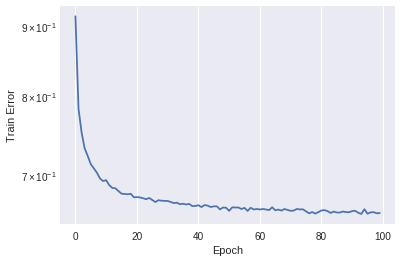

In [0]:
pd.Series(history.history['loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")

In [0]:
# NN

y_hat = np.round(model.predict([test.movieId, test.userId]),5)
y_true = test.rating

print(mean_absolute_error(y_true, y_hat))
print(mean_squared_error(y_true, y_hat))

0.6736864660471642
0.7729445777256072


In [0]:
test['Predicted'] = y_hat
test[:20]

,userId,movieId,rating,timestamp,title,genres,Predicted
30026,39,220,2.0,832059371,Junior (1994),737,3.34758
93038,468,2313,5.0,965846390,"Verdict, The (1982)",858,4.14457
56989,609,8219,3.0,1479544709,Kick-Ass 2 (2013),183,3.60903
67742,176,7181,4.0,1435525405,"Blind Side, The (2009)",812,3.63200
43549,264,463,4.0,965316627,Searching for Bobby Fischer (1993),812,3.78765
74144,289,1416,5.0,974938617,"Best Years of Our Lives, The (1946)",884,3.98883
58935,488,1021,4.0,1334587808,"Birds, The (1963)",922,3.49482
339,436,5,5.0,859721015,Heat (1995),260,3.92085
22944,390,2013,5.0,1030825002,Austin Powers: The Spy Who Shagged Me (1999),46,3.03446
15628,379,2632,5.0,1493474135,Predator (1987),332,3.84060


## Improved Deep Neural Networks for Recommendation

In [0]:
n_latent_factors_user = 2
n_latent_factors_movie = 3
n_latent_factors_genre = 4


movie_input = keras.layers.Input(shape=[1],name='Movie')
movie_embedding = keras.layers.Embedding(n_movies + 1, n_latent_factors_user, name='Movie-Embedding')(movie_input)
movie_vec = keras.layers.Flatten(name='FlattenMovies')(movie_embedding)
movie_vec = keras.layers.Dropout(0.2)(movie_vec)


user_input = keras.layers.Input(shape=[1],name='User')
user_embedding = keras.layers.Embedding(n_users + 1, n_latent_factors_movie, name='User-Embedding')(user_input)
user_vec = keras.layers.Flatten(name='FlattenUsers')(user_embedding)
user_vec = keras.layers.Dropout(0.2)(user_vec)

#######################
## New input layer
#######################
genre_input = keras.layers.Input(shape=[1],name='Genre')
genre_embedding = keras.layers.Embedding(n_genres + 1, n_latent_factors_genre,name='Genre-Embedding')(genre_input)
genre_vec = keras.layers.Flatten(name='FlattenGenres')(genre_embedding)
genre_vec = keras.layers.Dropout(0.2)(genre_vec)


concat = keras.layers.concatenate([movie_vec, user_vec, genre_vec],name='Concat')
concat_dropout = keras.layers.Dropout(0.2)(concat)
dense = keras.layers.Dense(200,name='FullyConnected')(concat)
dropout_1 = keras.layers.Dropout(0.2,name='Dropout')(dense)
dense_2 = keras.layers.Dense(100,name='FullyConnected-1')(concat)
dropout_2 = keras.layers.Dropout(0.2,name='Dropout')(dense_2)
dense_3 = keras.layers.Dense(50,name='FullyConnected-2')(dense_2)
dropout_3 = keras.layers.Dropout(0.2,name='Dropout')(dense_3)
dense_4 = keras.layers.Dense(20,name='FullyConnected-3', activation='relu')(dense_3)


result = keras.layers.Dense(1, activation='relu',name='Activation')(dense_4)
adam = Adam(lr=0.005)
model = keras.Model([movie_input, user_input, genre_input], result)
model.compile(optimizer=adam,loss= 'mean_squared_error')

In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Movie (InputLayer)              (None, 1)            0                                            
__________________________________________________________________________________________________
User (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
Genre (InputLayer)              (None, 1)            0                                            
__________________________________________________________________________________________________
Movie-Embedding (Embedding)     (None, 1, 2)         19450       Movie[0][0]                      
__________________________________________________________________________________________________
User-Embed

Text(0, 0.5, 'Train Error')

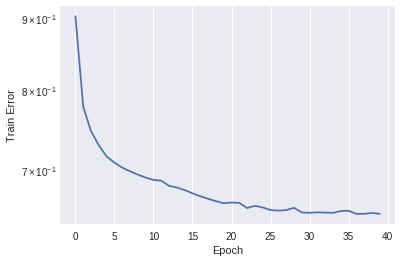

In [0]:
history = model.fit([train.movieId, train.userId, train.genres], train.rating, epochs=40, verbose=0)
pd.Series(history.history['loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")

In [0]:
# calculate MSE and MAE

from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
y_hat = np.round(model.predict([test.movieId, test.userId, test.genres]),5)
y_true = test.rating

print(mean_absolute_error(y_true, y_hat))
print(mean_squared_error(y_true, y_hat))

0.6641106509863266
0.7476150714282177


We can see that both MSE and MAE decreased a little bit.

In [0]:
test['Predicted'] = y_hat
test[:20]

,userId,movieId,rating,timestamp,title,genres,Predicted
30026,39,220,2.0,832059371,Junior (1994),737,3.46425
93038,468,2313,5.0,965846390,"Verdict, The (1982)",858,4.21053
56989,609,8219,3.0,1479544709,Kick-Ass 2 (2013),183,3.71366
67742,176,7181,4.0,1435525405,"Blind Side, The (2009)",812,3.54704
43549,264,463,4.0,965316627,Searching for Bobby Fischer (1993),812,3.71102
74144,289,1416,5.0,974938617,"Best Years of Our Lives, The (1946)",884,4.01543
58935,488,1021,4.0,1334587808,"Birds, The (1963)",922,3.53071
339,436,5,5.0,859721015,Heat (1995),260,3.97410
22944,390,2013,5.0,1030825002,Austin Powers: The Spy Who Shagged Me (1999),46,3.15744
15628,379,2632,5.0,1493474135,Predator (1987),332,3.80645
